# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Abby Lloyd
### Github Link: https://github.com/abbylloyd03/44620-Module7

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

### Question 1: Article html stored in separate file that is committed and pushed

In [1]:
import requests
import pickle

article_page = requests.get('https://www.rottentomatoes.com/m/black_panther_wakanda_forever/reviews')
article_html = article_page.text

with open('article_html.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
from bs4 import BeautifulSoup

with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')

# Find the reviews from the article. (This is the only part of the article I am interested in.)

article_content = soup.find_all('div', {'class': 'the_review'})

# Combine all the reviews into one string and get rid of tags

article_content_string = ' '.join([item.text for item in article_content])

# Check work

print(article_content_string)


                    There is indeed a  smattering of the character development. No doubt all abustle, some critics just understandably might’ve missed the transmogrifications. (Hint: Look for someone putting on a mask and another going all hue-y.)
                 
                    It’s generally well-paced and features an excellent lead performance from Wright and an Oscar-worthy performance from Bassett. For a movie with a complicated hole to dig itself out of, this sequel rises victorious.
                 
                    Kind of a mixed bag, but worth seeing if you liked the first one. 
                 
                    This film, leading into phase five, makes it as symbolic as it is impactful. It expands the MCU’s diversity through sheer authenticity.
                 
                    Like the first Black Panther movie, Black Panther: Wakanda Forever asks us to consider why and when vengeance is futile, and what the difference is between an antihero and an anti v

### Question 2: Polarity score printed with an appropriate label

In [3]:
# Sentiment analysis

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content_string)
print(f'Polarity: {doc._.polarity}')

Polarity: 0.17901714513556624


### Question 2: Number of sentences printed

In [4]:
# Find number of sentences

sentences = list(doc.sents)
sentences_no_blanks = [str(x).strip() for x in sentences if str(x) != '']
num_of_sents = len(sentences_no_blanks)
print('Number of sentences:', num_of_sents)

Number of sentences: 39


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

### Question 3: Correct (or equivalent in the case of multiple tokens with same frequency) tokens printed: 1 pt

In [5]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

# Add the movie title and other words I am not interested into the list of stop words
# nlp.Defaults.stop_words |= {'black', 'panther', 'wakanda', 'forever', 'movie', 'film'}
# I didn't like the summary, so I went back to the original stop words


doc = nlp(article_content_string)


# Remove whitespace, punctuation, and stopword tokens
# Convert all letters to lowercase

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]

# Count & print token frequency

word_freq = Counter(map(str,interesting_tokens))
print('Five most frequent tokens:', word_freq.most_common(5))

Five most frequent tokens: [('movie', 5), ('film', 5), ('black', 5), ('going', 4), ('panther', 4)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

### Question 4: Correct (or equivalent in the case of multiple lemmas with same frequency) lemmas printed

In [6]:
# Lemmatization
# Convert all letters to lowercase

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# Count & print lemma frequency

lemma_freq = Counter(interesting_lemmas)
print('Five most frequent lemmas:', lemma_freq.most_common(5))

Five most frequent lemmas: [('performance', 5), ('movie', 5), ('film', 5), ('black', 5), ('go', 4)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 5: Histogram shown with appropriate labelling

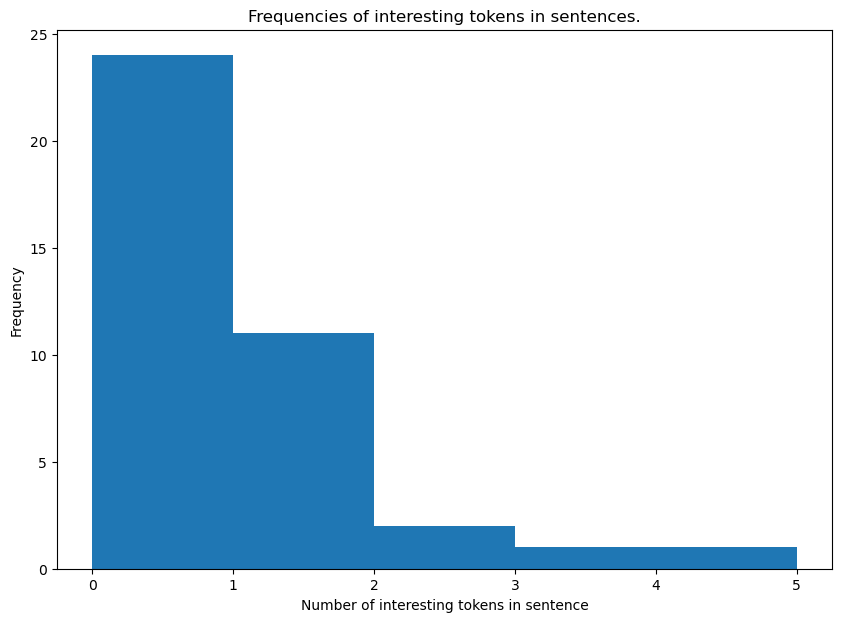

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Make a list of token counts per sentence (x) for histogram

def score_sentence_by_token_for_histogram(sentences, interesting_token):
    list = []
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lower_ in unpacked_tokens:
                count += 1
        list.append(count)
    return list

x = score_sentence_by_token_for_histogram(sentences, word_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title("Frequencies of interesting tokens in sentences.")
  
# adding labels
ax.set_xlabel('Number of interesting tokens in sentence')
ax.set_ylabel('Frequency')
ax.set_xticks([0, 1, 2, 3, 4, 5])

### What seems to be the most common range of scores: 0-1

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 6: Histogram shown with appropriate labelling

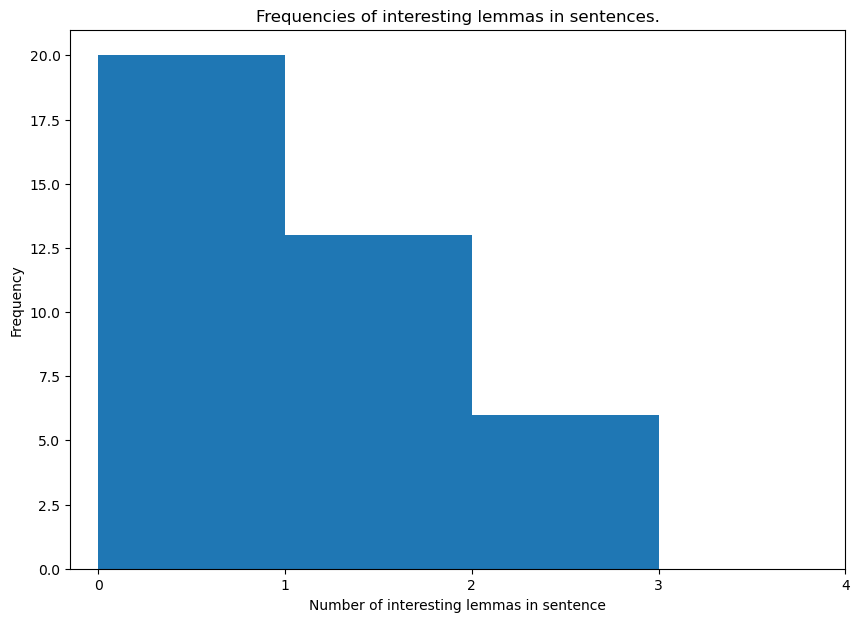

In [8]:
# Make a list of lemma counts per sentence (x) for histogram

def score_sentence_by_lemma_for_histogram(sentences, interesting_lemmas):
    list = []
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in unpacked_lemmas:
                count += 1
        list.append(count)
    return list


x = score_sentence_by_lemma_for_histogram(sentences, lemma_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title("Frequencies of interesting lemmas in sentences.")
  
# adding labels
ax.set_xlabel('Number of interesting lemmas in sentence')
ax.set_ylabel('Frequency')
ax.set_xticks([0, 1, 2, 3, 4])

### What seems to be the most common range of scores: 0-1

### Question 7: Cutoff score seems appropriate given histograms

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

#### Cutoff Score (tokens): 1 (This did not give me 6 sentences. However, I think it is the best solution, because when I lowered the cutoff I got too many sentences.)
#### Cutoff Score (lemmas): 1

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### Question 8: Summary contains a shortened version of the article (less than half the number of sentences)
### Question 8: Summary sentences are in the same order as they appeared in the original article

In [9]:
def sents_with_more_than_one_token(sentences, interesting_token):
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    
    list = []
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lower_ in unpacked_tokens:
                count += 1
        if count > 1: 
            list.append(sentence)
    return list

sents = sents_with_more_than_one_token(sentences, word_freq.most_common(5))
print("Number of sentences in summary:", len(sents))

# Remove white space
sentences_no_blanks2 = [''.join(str(x).strip()) for x in sents if str(x) != '']

# That did not remove all white space, so trying something more.
white_space_removed = []
for sent in sentences_no_blanks2:
    white_space_removed.append(sent.replace("\n", ""))

final_summary_token = ' '.join(str(x) for x in white_space_removed)
        
print(final_summary_token)

Number of sentences in summary: 4
Like the first Black Panther movie, Black Panther: Wakanda Forever asks us to consider why and when vengeance is futile, and what the difference is between an antihero and an anti villain. While suffering from exhausting connections to the ever-expanding Marvel Cinematic Universe, Black Panther: You may not be ready for everything that Black Panther is going to throw at you. Overall, the film is solid with a few passages worth going to the theater for.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question 9: Polarity score printed with an appropriate label

In [10]:
# Sentiment analysis

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(final_summary_token)
print(f'Polarity: {doc._.polarity}')

Polarity: -0.04305555555555555


### Question 9: Number of sentences printed

In [15]:
print("Number of sentences in summary:", len(sents))

Number of sentences in summary: 4


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### Question 10: Summary contains a shortened version of the article (less than half the number of sentences)
### Question 10: Summary sentences are in the same order as they appeared in the original article

In [11]:
def sents_with_more_than_one_lemma(sentences, interesting_lemmas):
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    
    list = []
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in unpacked_lemmas:
                count += 1
        if count > 1: 
            list.append(sentence)
    return list

sents_lemma = sents_with_more_than_one_lemma(sentences, lemma_freq.most_common(5))
print("Number of sentences in summary:", len(sents_lemma))

# Remove white space
sentences_no_blanks_lemmas = [''.join(str(x).strip()) for x in sents_lemma if str(x) != '']


# That did not remove all white space, so trying something more.
white_space_removed_lemmas = []
for sent in sentences_no_blanks_lemmas:
    white_space_removed_lemmas.append(sent.replace("\n", ""))

final_summary_lemmas = ' '.join(str(x) for x in white_space_removed_lemmas)

print(final_summary_lemmas)
        

Number of sentences in summary: 6
It’s generally well-paced and features an excellent lead performance from Wright and an Oscar-worthy performance from Bassett. Like the first Black Panther movie, Black Panther: Wakanda Forever asks us to consider why and when vengeance is futile, and what the difference is between an antihero and an anti villain. You may not be ready for everything that Black Panther is going to throw at you. It is unapologetically Black, African, colorful, and poignant.                                     ...the positive side, the performances are strong and the visual effects are outstanding. Overall, the film is solid with a few passages worth going to the theater for. This was a heavy film that has a lot of deep meaning and themes that might go over the general audience's head.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question 11: Polarity score printed with an appropriate label

In [16]:
# Sentiment analysis

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(final_summary_lemmas)
print(f'Polarity: {doc._.polarity}')

Polarity: 0.10199724517906333


### Question 11: Number of sentences printed

In [17]:
print("Number of sentences in summary:", len(sents_lemma))

Number of sentences in summary: 6


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### Question 12: Thoughtful answer based on reported polarity scores

#### Polarity score of original article:
- Polarity: 0.17901714513556624

#### Polarity score of summary using tokens:
- Polarity: -0.04305555555555555

#### Polarity score of summary using lemmas:
- Polarity: 0.10199724517906333

#### Discussion
- The summary developed using tokens had a negative polarity, while the summary developed using lemmas had a positive polarity. The original article had the most positive polarity.
- The list of interesting lemmas included the word 'performance'. This was not included in the list of interesting tokens. This changed some of the sentences that were included in the summary developed using lemmas. Many of the reviewers that posted to the web page agreed that the performances in the movie were positive, and I think that is reflected in the summary developed using lemmas.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### Question 13: Thoughtful answer based on summaries

#### Which summary is better?
- The summary developed using lemmas is better than the summary developed using tokens

#### Why do you think this might be?

- In my opinion, I believe the summary developed using interesting lemmas was more characteristic of the original article. 
- The summary developed using tokens was more negative than the overall character of the original article. This negativity is displayed with the negative polarity score that was produced when I did sentiment analysis of that summary. 
- The summary developed using lemmas was more positive and it touched on some of the more common ideas that showed up multiple times by different reviewers. 
- Also, the polarity score for this second summary was positive and closer to the polarity score for the entire article as a whole.
- The summary created using lemmas was also longer and provided more info. I think this gave a better idea of what the movie is like as a whole.